<a href="https://colab.research.google.com/github/ithsirs/PRODIGY_ML_01/blob/main/PRODIGY_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1
Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.



Dataset : -https://www.kaggle.com/datasets/camnugent/california-housing-prices

# Downloading Dataset



In [1]:
import kagglehub
import shutil
import os

# Define your desired destination folder
destination_folder = r"/content/sample_data"  # Change this path as you want

# Download latest version using kagglehub
downloaded_path = kagglehub.dataset_download("camnugent/california-housing-prices")

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Move files from kagglehub's cache to your desired folder
for item in os.listdir(downloaded_path):
    s = os.path.join(downloaded_path, item)
    d = os.path.join(destination_folder, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, dirs_exist_ok=True)
    else:
        shutil.copy2(s, d)

print("Dataset copied to:", destination_folder)


Dataset copied to: /content/sample_data


# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv(r"/content/sample_data/housing.csv")

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Data Processing

## Drop the null values

In [ ]:
data.dropna(inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Validation set

Dividing the data into trainning snd test sets

In [ ]:
from sklearn.model_selection import train_test_split

X=data.drop(['median_house_value'], axis=1)#dataset without target variable
Y=data['median_house_value'] #target variable

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2)


In [ ]:
train_data=X_train.join(Y_train) #train data

In [ ]:
train_data.shape

(16346, 10)

In [ ]:
X_train.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2439,-119.61,36.59,10.0,2842.0,620.0,1443.0,576.0,2.2727,INLAND
1666,-122.25,38.03,15.0,3338.0,532.0,1834.0,520.0,5.6293,NEAR BAY
7023,-118.10,33.98,33.0,1927.0,482.0,1623.0,479.0,3.5268,<1H OCEAN
14048,-117.13,32.76,41.0,1545.0,420.0,747.0,415.0,2.3750,NEAR OCEAN
99,-122.26,37.82,37.0,3633.0,1085.0,1838.0,980.0,2.6104,NEAR BAY


In [ ]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
11621,-118.04,33.83,19.0,4526.0,830.0,2318.0,748.0,4.6681,<1H OCEAN
13596,-117.30,34.10,49.0,60.0,11.0,76.0,13.0,2.5625,INLAND
9287,-122.55,38.07,38.0,3392.0,709.0,1894.0,713.0,3.0573,NEAR BAY
12314,-116.76,33.46,6.0,1251.0,268.0,544.0,216.0,3.0694,INLAND
7185,-118.17,34.04,39.0,563.0,138.0,682.0,137.0,2.7500,<1H OCEAN


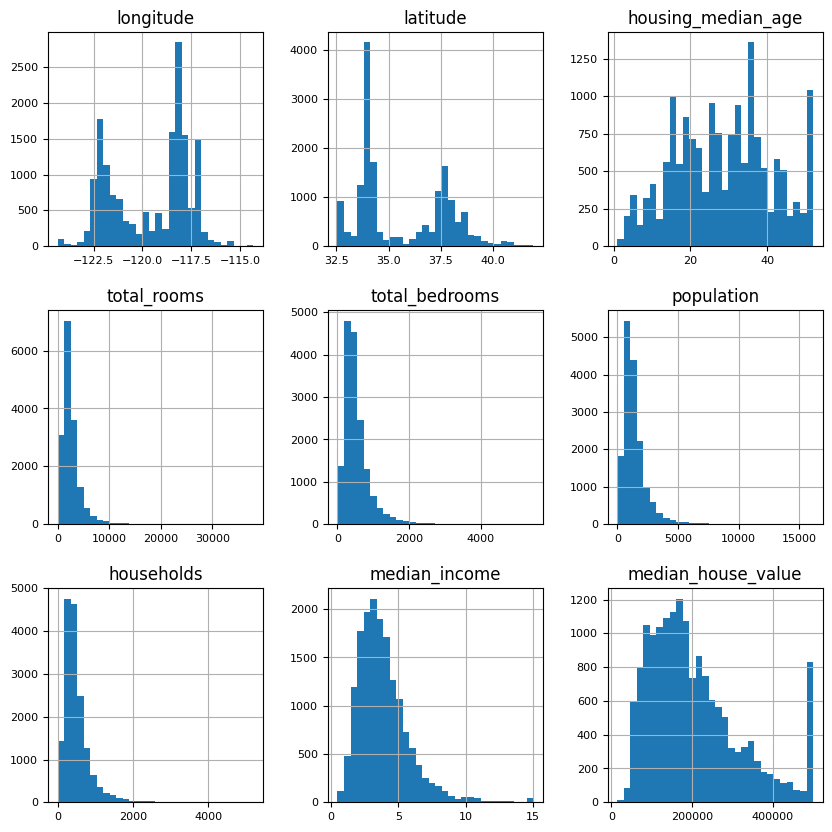

In [ ]:
train_data.hist(figsize=(10, 10), bins=30, xlabelsize=8, ylabelsize=8)
plt.show()

## Correlation Matrix

<Axes: title={'center': 'Correlation Heatmap'}>

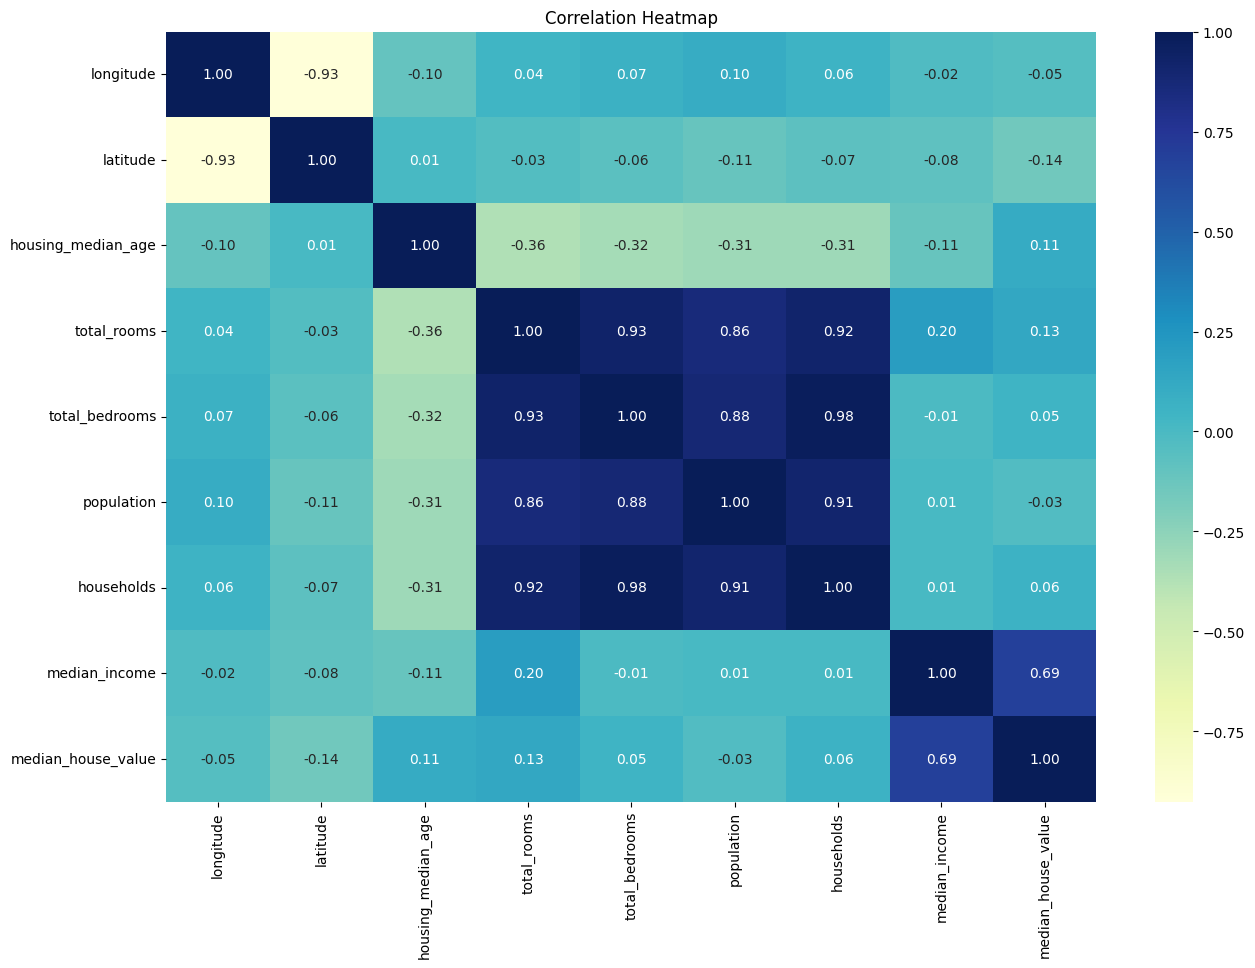

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Correlation Heatmap')
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt='.2f')


In [ ]:
train_data['total_rooms']= np.log(train_data['total_rooms'])
train_data['total_bedrooms']= np.log(train_data['total_bedrooms'])
train_data['population']= np.log(train_data['population'])
train_data['households']= np.log(train_data['households'])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

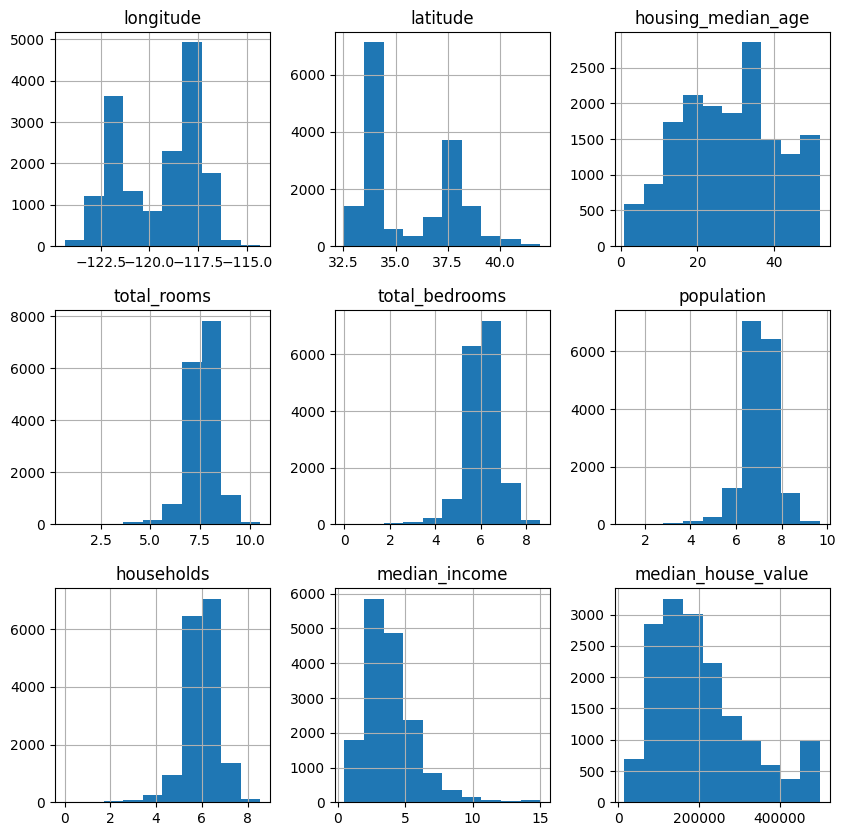

In [ ]:
train_data.hist(figsize=(10,10))

## Cateorical to Binary features or numerical

In [ ]:
train_data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,7244
INLAND,5183
NEAR OCEAN,2096
NEAR BAY,1820
ISLAND,3


less than 1 hour from ocean- 1
else ocean_proximity=2

In [ ]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(float)).drop(['ocean_proximity'], axis=1)

In [ ]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2439,-119.61,36.59,10.0,7.952263,6.429719,7.274480,6.356108,2.2727,92700.0,0.0,1.0,0.0,0.0,0.0
1666,-122.25,38.03,15.0,8.113127,6.276643,7.514255,6.253829,5.6293,197600.0,0.0,0.0,0.0,1.0,0.0
7023,-118.10,33.98,33.0,7.563720,6.177944,7.392032,6.171701,3.5268,152000.0,1.0,0.0,0.0,0.0,0.0
14048,-117.13,32.76,41.0,7.342779,6.040255,6.616065,6.028279,2.3750,154400.0,0.0,0.0,0.0,0.0,1.0
99,-122.26,37.82,37.0,8.197814,6.989335,7.516433,6.887553,2.6104,193100.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
train_data.shape

(16346, 14)

<Axes: title={'center': 'Correlation Heatmap'}>

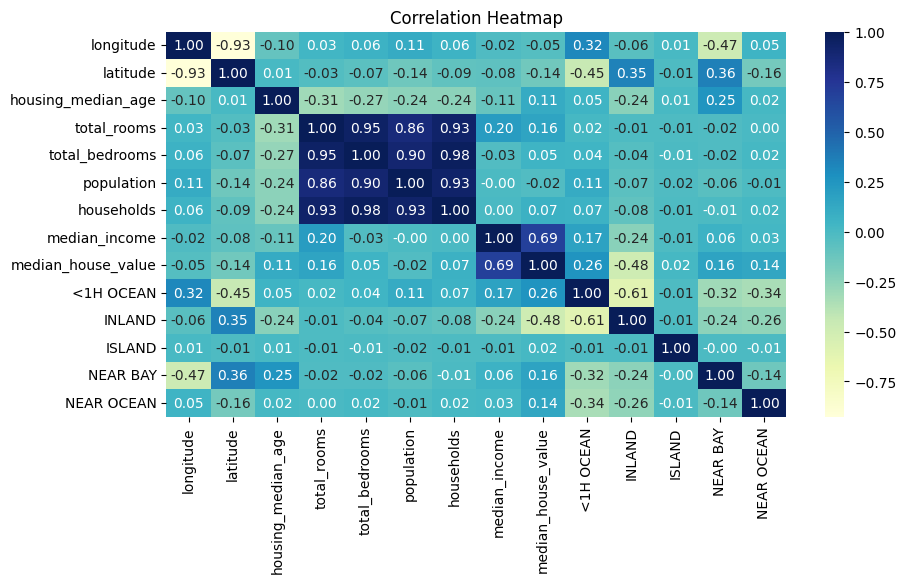

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Correlation Heatmap')
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu', fmt='.2f')


<Axes: xlabel='latitude', ylabel='longitude'>

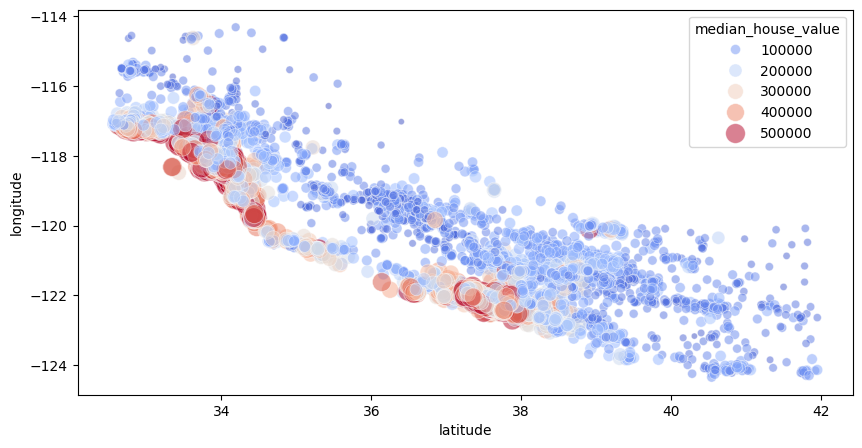

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm", size="median_house_value", sizes=(20, 200), alpha=0.5)

# Feature Engineering

In [ ]:
train_data['bedroom_ratio']= train_data['total_bedrooms']/train_data['total_rooms']
train_data['households_ratio']= train_data['total_rooms']/train_data['households']

In [ ]:
train_data.shape

(16346, 16)

<Axes: title={'center': 'Correlation Heatmap'}>

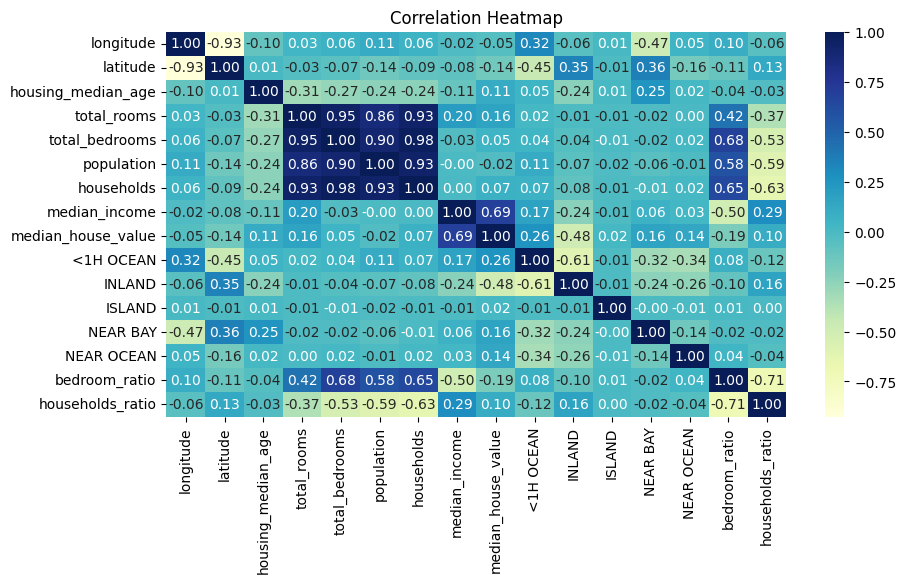

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Correlation Heatmap')
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu', fmt='.2f')

# Linear Regression

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
# Separate features and target
X_train = train_data.drop(['median_house_value'], axis=1)
Y_train = train_data['median_house_value']

# Check shapes
print(X_train.shape, Y_train.shape)

# Replace infinite values with NaNs, then drop or fill them
X_train = X_train.replace([np.inf, -np.inf], np.nan)

# Option 1: Drop rows with NaN values
#X_train = X_train.dropna()
#Y_train = Y_train[X_train.index]  # Keep target aligned with features

# Option 2 (alternative): Fill NaNs with mean of the column
X_train = X_train.fillna(X_train.mean())
X_train_s= scaler.fit_transform(X_train)
# Fit the model
reg = LinearRegression()
reg.fit(X_train_s, Y_train)


(16346, 15) (16346,)


LinearRegression()

In [ ]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_ratio
2439,-119.61,36.59,10.0,7.952263,6.429719,7.274480,6.356108,2.2727,0.0,1.0,0.0,0.0,0.0,0.808540,1.251122
1666,-122.25,38.03,15.0,8.113127,6.276643,7.514255,6.253829,5.6293,0.0,0.0,0.0,1.0,0.0,0.773640,1.297306
7023,-118.10,33.98,33.0,7.563720,6.177944,7.392032,6.171701,3.5268,1.0,0.0,0.0,0.0,0.0,0.816786,1.225549
14048,-117.13,32.76,41.0,7.342779,6.040255,6.616065,6.028279,2.3750,0.0,0.0,0.0,0.0,1.0,0.822612,1.218056
99,-122.26,37.82,37.0,8.197814,6.989335,7.516433,6.887553,2.6104,0.0,0.0,0.0,1.0,0.0,0.852585,1.190236


In [ ]:
X_test.shape

(4087, 9)

In [ ]:
test_data= X_test.join(Y_test)

test_data['total_rooms']= np.log(test_data['total_rooms'])
test_data['total_bedrooms']= np.log(test_data['total_bedrooms'])
test_data['population']= np.log(test_data['population'])
test_data['households']= np.log(test_data['households'])

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(float)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio']= test_data['total_bedrooms']/test_data['total_rooms']
test_data['households_ratio']= test_data['total_rooms']/test_data['households']

In [ ]:
X_test.shape

(4087, 9)

In [ ]:
X_test = test_data.drop(['median_house_value'], axis=1)
Y_test = test_data['median_house_value']

X_test = X_test.replace([np.inf, -np.inf], np.nan)
X_test = X_test.fillna(X_test.mean())

In [ ]:

X_test_s = scaler.transform(X_test)


In [ ]:
print(X_test.shape, Y_test.shape)

(4087, 15) (4087,)


In [ ]:
reg.score(X_test_s, Y_test)

0.6767407520679269

# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest= RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train_s,Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
forest.score(X_test_s,Y_test)

0.8237110305521818

In [ ]:
from sklearn.model_selection import GridSearchCV
forest= RandomForestRegressor()
param_grid = {
    "n_estimators": [100,150,200],
    "max_features":[6,8,10],
    "max_depth":[10,20,30]

}

grid_search= GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30], 'max_features': [6, 8, 10],
                         'n_estimators': [100, 150, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest=grid_search.best_estimator_
best_forest.score(X_test_s,Y_test)

0.8246089764412622

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Predictions on Test Data
predictions = best_forest.predict(X_test_s)
results_df = pd.DataFrame({
    "Actual Price": Y_test.values,
    "Predicted Price": predictions,
    "Absolute Loss": np.abs(Y_test.values - predictions)
})

# Show sample of predicted vs actual
print("\n--- Sample Test Predictions ---")
print(results_df.head(40))

# Optional: Show mean errors
print("\n--- Test Error Metrics ---")
print("MAE:", mean_absolute_error(Y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, predictions)))

# 2. Future Prediction
def predict_house_price(user_input_dict):
    """
    user_input_dict: Dictionary with the same feature keys as X_train (before scaling)
    Example:
        {
            'longitude': -122.23,
            'latitude': 37.88,
            'housing_median_age': 41.0,
            ...
            'INLAND': 1.0,
            'NEAR BAY': 0.0,
            ...
        }
    """
    user_df = pd.DataFrame([user_input_dict])

    # Log transform
    for col in ['total_rooms', 'total_bedrooms', 'population', 'households']:
        user_df[col] = np.log(user_df[col])

    # Feature engineering
    user_df['bedroom_ratio'] = user_df['total_bedrooms'] / user_df['total_rooms']
    user_df['households_ratio'] = user_df['total_rooms'] / user_df['households']

    # Reorder to match training columns
    user_df = user_df[X_train.columns]

    # Handle missing/infinite values
    user_df = user_df.replace([np.inf, -np.inf], np.nan).fillna(X_train.mean())

    # Scale
    user_scaled = scaler.transform(user_df)

    # Predict
    predicted_price = best_forest.predict(user_scaled)[0]
    print("\nPredicted House Price: ${:,.2f}".format(predicted_price))

# Example usage:
example_input = {
    'longitude': -130.10,
    'latitude': 34.05,
    'housing_median_age': 35,
    'total_rooms': 4000,
    'total_bedrooms': 800,
    'population': 1000,
    'households': 500,
    'median_income': 4.5,
    'INLAND': 0.0,
    'ISLAND': 0.0,
    'NEAR BAY': 1.0,
    'NEAR OCEAN': 0.0,
    '<1H OCEAN': 0.0,
}
predict_house_price(example_input)



--- Sample Test Predictions ---
    Actual Price  Predicted Price  Absolute Loss
0       320700.0    251966.375000   68733.625000
1        75000.0    146132.575000   71132.575000
2       350800.0    194353.000000  156447.000000
3       173400.0    141223.000000   32177.000000
4       150000.0    138364.005000   11635.995000
5       198700.0    178640.737500   20059.262500
6       184900.0    206216.361111   21316.361111
7       233500.0    226336.515000    7163.485000
8       500001.0    453628.400000   46372.600000
9       158800.0    179790.500000   20990.500000
10      107900.0    142379.500000   34479.500000
11      211300.0    289216.510000   77916.510000
12       61100.0     68016.500000    6916.500000
13      227300.0    306247.015000   78947.015000
14      274200.0    242495.500000   31704.500000
15      119100.0    152405.000000   33305.000000
16       92400.0    151639.150000   59239.150000
17      156800.0    143055.500000   13744.500000
18      435000.0    415570.380000   